
# Trabajo Práctico 2

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [85]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```



In [86]:
df = pd.read_csv('data/pokemon/pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [87]:
print("Cantidad de filas y variables:")
print(df.shape)

print("Chequeamos filas con valores nulos, o raros")
df.info()




Cantidad de filas y variables:
(801, 41)
Chequeamos filas con valores nulos, o raros
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    fl

In [88]:
# Hay 4 columnas con valores nulos, no me preocupan si les faltan algunos valores pero en algunos casos como type2 la mitad son nulos!
# columna height_m (27) float64, percentage_male (31) float64, type2 (37), weight_kg (38)
# Voy a hacer lo siguiente, para los casos numéricos, voy a aplicarles la media o algún valor base, y 
# voy a descartar la columna type2 ya que la mitad de los datos están vacíos, 
# creo que van a generar confusión (OJO, revisar el cruce de type2 X is_legendary para ver si incide pero seguro que no)

df['type2'].fillna("None", inplace=True)

media_height_m = df['height_m'].mean()
media_percentage_male = df['percentage_male'].mean()
media_weight_kg = df['weight_kg'].mean()

df['height_m'].fillna(media_height_m, inplace=True)
df['percentage_male'].fillna(media_percentage_male, inplace=True)
df['weight_kg'].fillna(media_weight_kg, inplace=True)

cant_legendarios_type2 = df[df.is_legendary == 1].groupby('type2', as_index=False)
# Efectivamente, de los pokemon legendarios, una buena parte son None de type2, entonces lo descarto porque no me suma nada
print(cant_legendarios_type2.size())


df.drop('type2', inplace=True, axis=1)

# Además, tengo bastante valores objetos o de tipo clase, que puedo convertir a número

# revisando el CSV, las columnas de nombre y nombre japonés no aportan nada, así que las puedo eliminar también, esto es porque son únicas por fila

df.drop('japanese_name', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)


       type2  size
0       None    25
1     dragon     4
2   electric     1
3      fairy     6
4   fighting     6
5       fire     2
6     flying    10
7      ghost     2
8      grass     2
9     ground     1
10       ice     1
11    poison     1
12   psychic     4
13     steel     4
14     water     1


In [89]:
# Por último, tengo que hacer algo con la parte de abilities, porque tengo varios valores por cada fila

# De las 7 columnas de object, ya eliminé 3, me quedan 4: abilities, capture_rate, classification, type1
# Por cuestiones de simplicidad, vamos a no utilizar la columna abilities (al menos por ahora), ya que hay varios valores únicos, 
# pero una posibilidad transformarlos en columnas booleanas (aumentando la complejidad del problema)

df.drop('abilities', inplace=True, axis=1)

print("Capture rate:")
print(df['capture_rate'].tolist()) # -> este es numérico, solo hay un valor que no corresponde así que lo voy a convertir a la media

df['capture_rate'] =  pd.to_numeric(df['capture_rate'], errors='coerce')
media_capture_rate = df['capture_rate'].mean()
df['capture_rate'].fillna(media_capture_rate, inplace=True)


Capture rate:
['45', '45', '45', '45', '45', '45', '45', '45', '45', '255', '120', '45', '255', '120', '45', '255', '120', '45', '255', '127', '255', '90', '255', '90', '190', '75', '255', '90', '235', '120', '45', '235', '120', '45', '150', '25', '190', '75', '170', '50', '255', '90', '255', '120', '45', '190', '75', '190', '75', '255', '50', '255', '90', '190', '75', '190', '75', '190', '75', '255', '120', '45', '200', '100', '50', '180', '90', '45', '255', '120', '45', '190', '60', '255', '120', '45', '190', '60', '190', '75', '190', '60', '45', '190', '45', '190', '75', '190', '75', '190', '60', '190', '90', '45', '45', '190', '75', '225', '60', '190', '60', '90', '45', '190', '75', '45', '45', '45', '190', '60', '120', '60', '30', '45', '45', '225', '75', '225', '60', '225', '60', '45', '45', '45', '45', '45', '45', '45', '255', '45', '45', '35', '45', '45', '45', '45', '45', '45', '45', '45', '45', '45', '25', '3', '3', '3', '45', '45', '45', '3', '45', '45', '45', '45', '45', '4

(801, 641)
          classfication  size
0     Abundance Pokémon     1
1         Alpha Pokémon     1
2    Artificial Pokémon     1
3        Aurora Pokémon     1
4   Bolt Strike Pokémon     1
..                  ...   ...
61   Vast White Pokémon     1
62      Victory Pokémon     1
63      Volcano Pokémon     1
64    Willpower Pokémon     1
65         Wish Pokémon     1

[66 rows x 2 columns]
       type1  size
0        bug     3
1       dark     3
2     dragon     7
3   electric     5
4      fairy     1
5       fire     5
6     flying     1
7      ghost     1
8      grass     4
9     ground     2
10       ice     2
11    normal     3
12   psychic    17
13      rock     4
14     steel     6
15     water     6


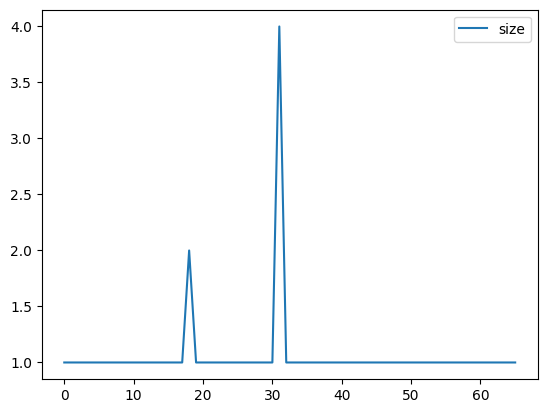

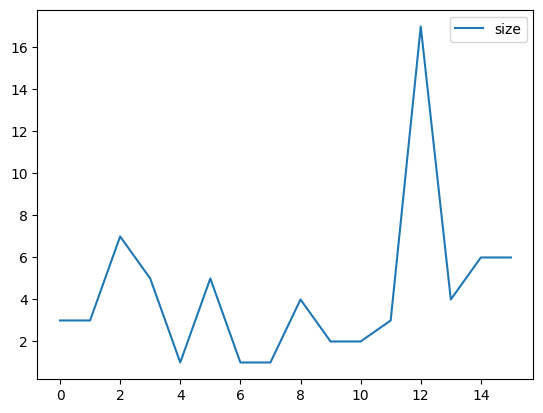

In [90]:
# A classification y type1 vamos a convertirlas
#print("Classification:")
#print(df['classfication'].tolist())

#print("Type:")
#print(df['type1'].tolist())

# classfication
one_hot = pd.get_dummies(df['classfication'])
df_transform = df.copy()
df_transform = df.drop('classfication',axis = 1)
df_transform = df_transform.join(one_hot)

# type
one_hot = pd.get_dummies(df['type1'])
df_transform = df_transform.drop('type1',axis = 1)
df_transform = df_transform.join(one_hot)

print(df_transform.shape) # -> nos está sumando muchas columnas, esto vuelve computacionalmente muy complicado el problema

# Pensemos otra alternativa, vamos a ver la incidencia de estas 2 columnas en los pokemon legendario

cant_legendarios_classfication = df[df.is_legendary == 1].groupby('classfication', as_index=False)
print(cant_legendarios_classfication.size())

cant_legendarios_classfication.size().plot()

cant_legendarios_type1 = df[df.is_legendary == 1].groupby('type1', as_index=False)
print(cant_legendarios_type1.size())

cant_legendarios_type1.size().plot()

# Como vemos con los gráficos, parecen no incidir en los resultados finales, para una primera aproximación, podemos descartalos

df.drop('type1', inplace=True, axis=1)
df.drop('classfication', inplace=True, axis=1)

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [122]:
from sklearn.linear_model import ElasticNet, ElasticNetCV, LogisticRegression, LogisticRegressionCV, SGDClassifier, SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, log_loss
from sklearn import preprocessing

# Teniendo el dataset "limpio" podemos intentar aplicar algún mecanismo para nuestro modelo, pero primero normalizamos

scaler = StandardScaler()

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_normalized = scaler.fit_transform(X_train) 
test_normalized = scaler.fit_transform(X_test) 

# Partimos el dataset en 80% de train y 20% de test
# Vamos a probar diferentes métodos para ver qué resultado nos dan, y que facilidad tienen, y vamos a probar algunas métricas que 
# ya tiene cada método (ver función score) o las de sklearn


In [117]:
# Teniendo en todas las actividades anteriores de la práctica, vamos a intentar reducir las variables aplicando PCA:

pca = PCA(n_components=0.95, random_state=10).fit(train_normalized)

X_train_pca = pca.transform(train_normalized)
X_test_pca = pca.transform(test_normalized)

# En teoría, si los datos de train y test tienen la misma distribuciíon (y si el shuffle está bien hecho), deberían darnos las mismas variables!
print(X_train_pca.shape[1]) # Tenemos 19 variables, bajamos de casi 40
print(X_test_pca.shape[1]) 

# Coinciden OK

23
23


In [100]:
# Probemos con LinearRegression: 
# Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

regr = LinearRegression()
  
regr.fit(X_train_pca, y_train)
y_pred = regr.predict(X_test_pca)
# La métrica usada por detrás es el r2
print(regr.score(X_test_pca, y_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficientes: ", regr.coef_) # Valores de la regresión lineal

# Nos arroja un R2 de 0.63, siendo 1.0 si la predicción fuese 100% perfecta, consideramos que la predicción es buena si está por encima del 0.9

0.7027058868207607
MSE: 0.03
Coeficientes:  [ 0.0637887  -0.02335071  0.02572409 -0.00095777  0.0024237  -0.01832124
  0.00219783  0.00334756  0.0627051  -0.01597629  0.03939788  0.07208398
 -0.00685164  0.00927876 -0.01687043  0.03864545  0.04403201 -0.09787335
 -0.02039142  0.06504037 -0.03033081 -0.03453051 -0.03724048]


In [112]:
# Probemos con ElasticNet, un método similar al de LinearRegression pero que combina Ridge + Lasso por lo tanto las penalizaciones se computan
# de forma diferente

enet_model = ElasticNet().fit(X_train_pca, y_train)

y_pred = enet_model.predict(X_test_pca)
print("Score de ElasticNet: ")
print(r2_score(y_test, y_pred))
print("MSE de ElasticNet: ")
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print("Alpha de ElasticNet: ")
print(enet_model.get_params()['alpha'])

# En este caso me da una pésima estimación, pero podemos tunear el modelo

# Veamos con el caso de ElasticNetCV, donde podemos probar varios alphas (hiperparámetro) para elegir el mejor
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
enet_cv_model = ElasticNetCV(alphas=alphas, cv = 5, random_state=0).fit(X_train_pca,y_train)

y_pred_new = enet_cv_model.predict(X_test_pca)

print("Score de ElasticNetCV: ")
print(enet_cv_model.score(X_test_pca, y_test))
# Me da 0.7 lo cual es un número similar al caso del regresor linear
print("MSE de ElasticNetCV: ")
print(np.sqrt(mean_squared_error(y_test,y_pred_new)))
print("alpha de ElasticNetCV elegido: ")
print(enet_cv_model.alpha_)

Score de ElasticNet: 
-0.009399417856448933
MSE de ElasticNet: 
0.31659927806719773
Alpha de ElasticNet: 
1.0
Score de ElasticNetCV: 
0.7016469200598956
MSE de ElasticNetCV: 
0.17212488297494719
alpha de ElasticNetCV elegido: 
0.001


In [124]:
# Veamos con LogisticRegressor

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_pca, y_train)

predictions = logisticRegr.predict(X_test_pca)

score = logisticRegr.score(X_test_pca, y_test)
# Me da un score de 0.96, lo cual es altísimo
print(score)

# Para el logisticregressor, conviene usar otra métrica para cuantificar el error
y_probs = logisticRegr.predict_proba(X_test_pca)
print(log_loss(y_test, y_probs))


0.968944099378882
0.10753199443331439


In [129]:
# Veamos con LogisticRegressorCV

logr_cv = LogisticRegressionCV(max_iter=1000, cv=10)

logr_cv.fit(X_train_pca, y_train)
print("Score: ")
print(logr_cv.score(X_test_pca, y_test))

y_probs = logr_cv.predict_proba(X_test_pca)
print(log_loss(y_test, y_probs))

# Este método tardó más por la cantidad de iteraciones máximas definidas, obtuvo un error menor pero el score sigue siendo el mismo

Score: 
0.968944099378882
0.08507082179831281


In [133]:
# Probemos con un último método, Stochastic Gradient Descent
# Referencias: 
# https://www.datatechnotes.com/2020/09/sgd-classification-example-with-sgdclassifier-in-python.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

sgdc = SGDClassifier(max_iter=1000, tol=0.01)

sgdc.fit(X_train_pca, y_train)

score = sgdc.score(X_train_pca, y_train)
print("Score: ", score) 

y_pred = sgdc.predict(X_test_pca)

print("Matriz de confusión:")
# Nos indica donde cayó cada valor predicho con respecto al real, tenemos buenos valores
cm = confusion_matrix(y_test, y_pred)
print(cm) 

print("Reporte de clasificación:")
# Nos da métricas como precisión, recall (TP / (TP + FN))
cr = classification_report(y_test, y_pred)
print(cr)


Score:  0.990625
Matriz de confusión:
[[140   3]
 [  4  14]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       143
           1       0.82      0.78      0.80        18

    accuracy                           0.96       161
   macro avg       0.90      0.88      0.89       161
weighted avg       0.96      0.96      0.96       161



In [137]:
# Hagamos una última prueba pero sin usar PCA, con LinearRegressor y XGBoost (un método utilizado en el paper analizado!)

import xgboost as xgb # Hay que instalar el paquete con: pip install xgboot
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

scaler = StandardScaler()

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

train_normalized = scaler.fit_transform(X_train) 
test_normalized = scaler.fit_transform(X_test) 

regr = LinearRegression()
  
regr.fit(train_normalized, y_train)
y_pred = regr.predict(test_normalized)
# La métrica usada por detrás es el r2
print(regr.score(test_normalized, y_test))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("Coeficientes: ", regr.coef_) # Valores de la regresión lineal

# Da un poco más alto! pero con PCA usamos la mitad de variables


0.8011322082173924
MSE: 0.02
Coeficientes:  [ 0.00282532 -0.00477768 -0.03307019  0.00200421 -0.00426744 -0.01820388
 -0.00623119  0.01313996 -0.00552692  0.00349328  0.012928    0.00181062
  0.00426925  0.0021852  -0.00295954  0.01168231  0.00290701 -0.00294352
  0.00319445  0.23688523  0.02104045  0.00708712  0.00730115  0.01115434
  0.0129415  -0.01000807 -0.01047527 -0.00780911  0.02802411  0.01053024
 -0.00259671  0.01409112  0.01722977 -0.02439556]


In [147]:
# XGBoost
xg_reg = xgb.XGBRegressor()

xg_reg.fit(train_normalized,y_train)

preds = xg_reg.predict(test_normalized)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("R2:", xg_reg.score(test_normalized,y_test))

# Da un score altísimo
# TODO: investigar como jugar con los parámetros
# Se probaron algunos valores como xgb.XGBRegressor(objective ='binary:logistic', learning_rate = 0.1, max_depth = 10, alpha = 0.01, n_estimators = 50)
# Dependiendo de los parámetros, especialmente n_estimators, el R2 daba muy bajo o muy alto

RMSE: 0.006130
R2: 0.9996216234090625
